In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris



# 3. Heatmap


In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
print('Iris dataset shape:', df.shape)
print("\nFirst rows: "); print(df.head())

Iris dataset shape: (150, 5)

First rows: 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [5]:
numeric_df = df.drop('species', axis=1)
corr_m = numeric_df.corr()


Corr Matrix: 
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)               1.00             -0.12               0.87   
sepal width (cm)               -0.12              1.00              -0.43   
petal length (cm)               0.87             -0.43               1.00   
petal width (cm)                0.82             -0.37               0.96   

                   petal width (cm)  
sepal length (cm)              0.82  
sepal width (cm)              -0.37  
petal length (cm)              0.96  
petal width (cm)               1.00  


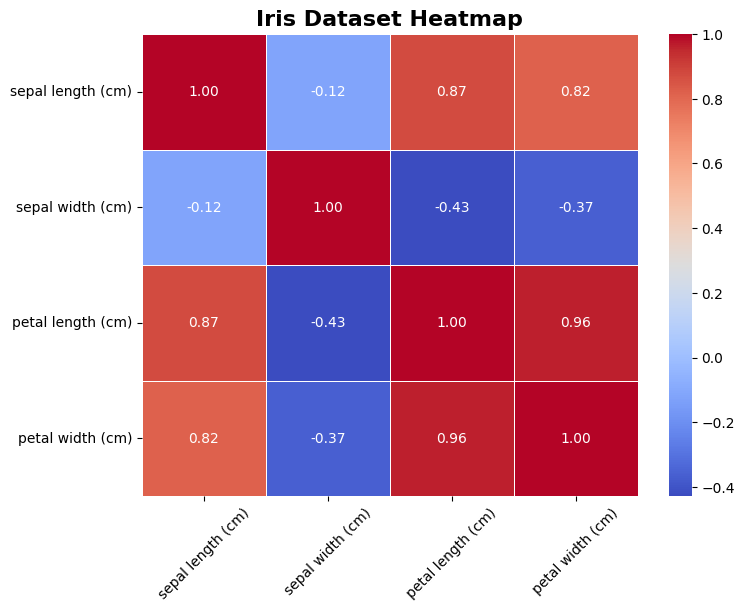

Corr analysis: 
Strong correlation (|r| > 0.7): 


In [6]:
print("\nCorr Matrix: "); print(corr_m.round(2))
plt.figure(figsize=(8, 6))
sns.heatmap(corr_m, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Iris Dataset Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

# 4. Strong Correlations Analysis
print("Corr analysis: ")
print("Strong correlation (|r| > 0.7): ")

In [ ]:
# Extract pairs with high correlation (excluding diagonal)
strong_pairs = corr_m.unstack().sort_values(ascending=False)
strong_pairs = strong_pairs[(abs(strong_pairs) > 0.7) & (abs(strong_pairs) < 1.0)]

# Filter duplicates and print
seen = set()
for (f1, f2), val in strong_pairs.items():
    if (f2, f1) not in seen:
        print(f"{f1} - {f2}: {val:.3f}")
        seen.add((f1, f2))

petal length (cm) - petal width (cm): 0.963
sepal length (cm) - petal length (cm): 0.872
sepal length (cm) - petal width (cm): 0.818
